In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import graphviz

In [6]:
data = pd.read_csv("resources/Automobile_data.csv")
data.replace("?",np.nan, inplace = True)
string_col = data.select_dtypes(exclude = np.number)
num_col = data.select_dtypes(include = np.number)

In [7]:
for i in num_col: 
  data[i] = pd.to_numeric(data[i],errors = 'raise')
for i in string_col:
  print(i) 
  data[i] = data[i].astype('category').cat.as_unordered()

normalized-losses
make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
engine-type
num-of-cylinders
fuel-system
bore
stroke
horsepower
peak-rpm
price


In [8]:
for i in data: 
  if(str(data[i].dtype)=='category'):
    data[i] = data[i].cat.codes

In [9]:
data.fillna(data.median(),inplace = True)

In [10]:
X = data.drop('symboling', axis = 1)
y = data['symboling']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)   

Logistic Regression


/Users/karthikprakasham/PycharmProjects/MyHandsOn_AI_ML_Project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         1
          -1       0.80      0.80      0.80         5
           0       0.73      0.61      0.67        18
           1       0.45      0.62      0.53         8
           2       0.17      0.20      0.18         5
           3       0.50      0.50      0.50         4

    accuracy                           0.56        41
   macro avg       0.44      0.46      0.45        41
weighted avg       0.58      0.56      0.56        41

F1 Score: 0.4458001063264221


/Users/karthikprakasham/PycharmProjects/MyHandsOn_AI_ML_Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/karthikprakasham/PycharmProjects/MyHandsOn_AI_ML_Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/karthikprakasham/PycharmProjects/MyHandsOn_AI_ML_Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

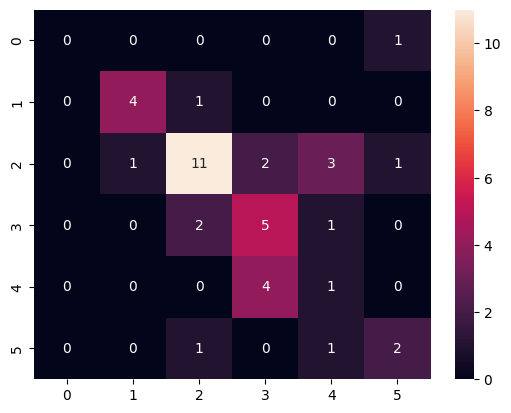

In [12]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Logistic Regression")
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)
print(classification_report(y_test,y_pred))
print("F1 Score:",f1_score(y_test, y_pred, average='macro'))

Decision Tree classification
              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.83      1.00      0.91         5
           0       0.94      0.83      0.88        18
           1       0.55      0.75      0.63         8
           2       0.67      0.40      0.50         5
           3       1.00      1.00      1.00         4

    accuracy                           0.80        41
   macro avg       0.83      0.83      0.82        41
weighted avg       0.82      0.80      0.80        41

F1 Score: 0.8205037996059668


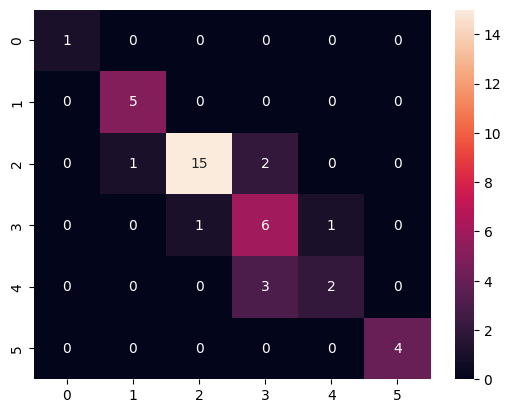

In [13]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Decision Tree classification")
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)
print(classification_report(y_test,y_pred))
print("F1 Score:",f1_score(y_test, y_pred, average='macro'))

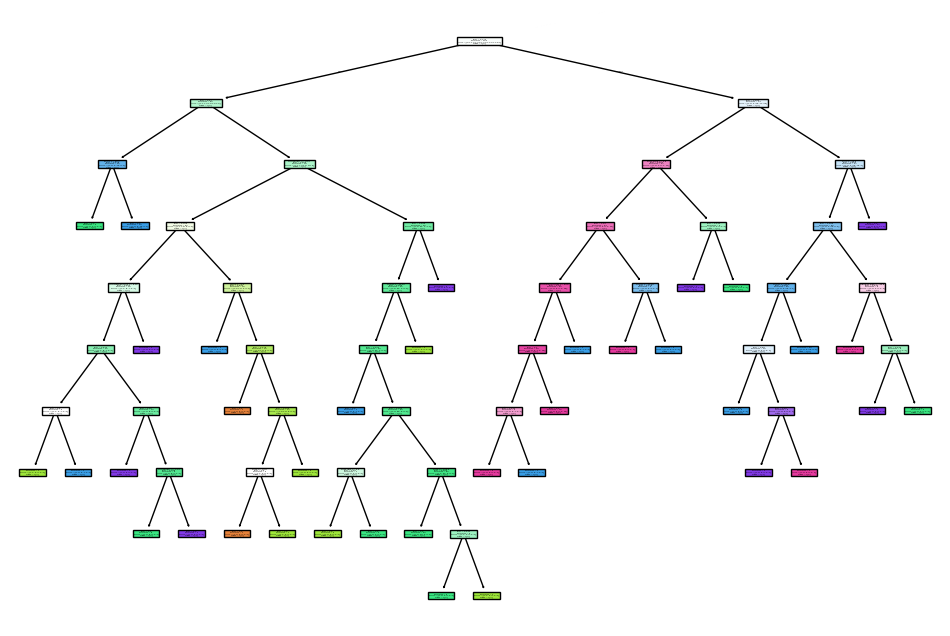

In [14]:
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=X.columns, class_names=True, filled=True)
plt.show()

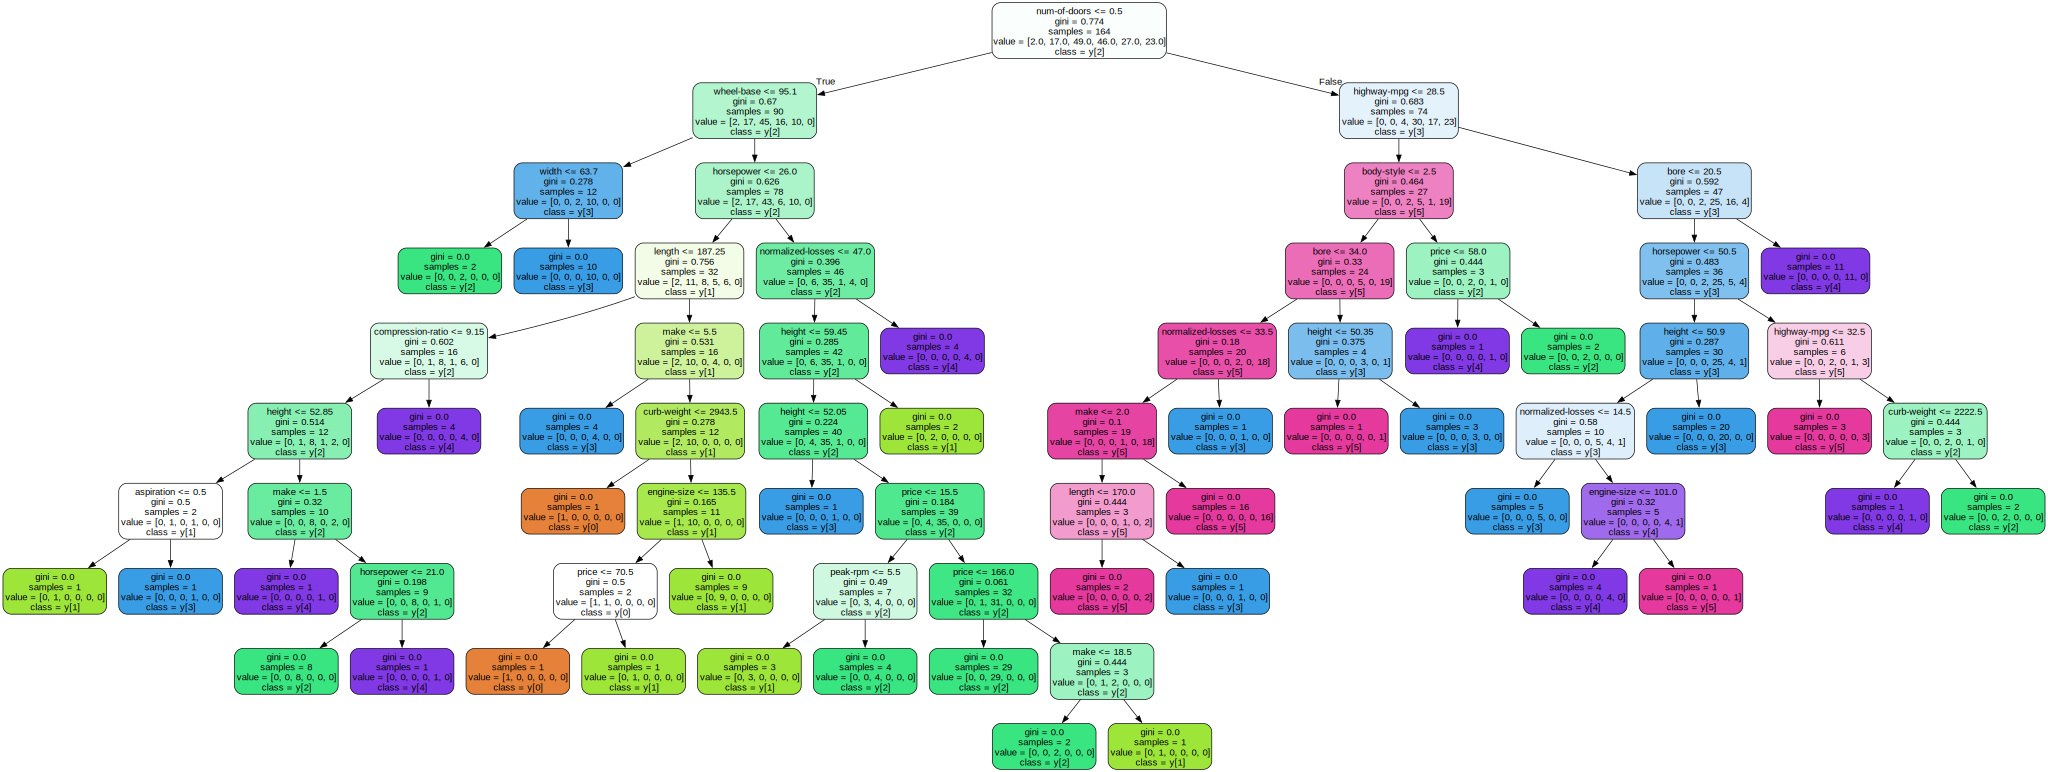

In [15]:
dot = export_graphviz(dt, out_file = None, feature_names = X.columns, class_names =True, filled = True, rounded = True)
graph = graphviz.Source(dot)
graph.render('dt', format = 'png')
graph